In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import swiss_roll_dataset_generator as roll_generator
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots
from mcu_chamfer import MCUChamferModel


In [6]:
figure_num = 15 ** 2
figure_point_cnt = 1600
deterministic_param_scatter = False
p = 2
noise_level = 0
lw = np.array([1, 1])
up = np.array([10, 10])
param_names = np.array(["c1", "c2"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, roll_generator.generate_swiss_roll,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt)
mcu_model = MCUChamferModel(k=10, c=0.05, figures=figures, params=control_vars, params_names=param_names)


In [7]:
mcu_model.train(max_iters=100, do_cliques=False, keep_mutual_only=True)
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")

/Users/Ekaterina.Inkina/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


rre_median_embedding_vs_params: 0.000855356445600976


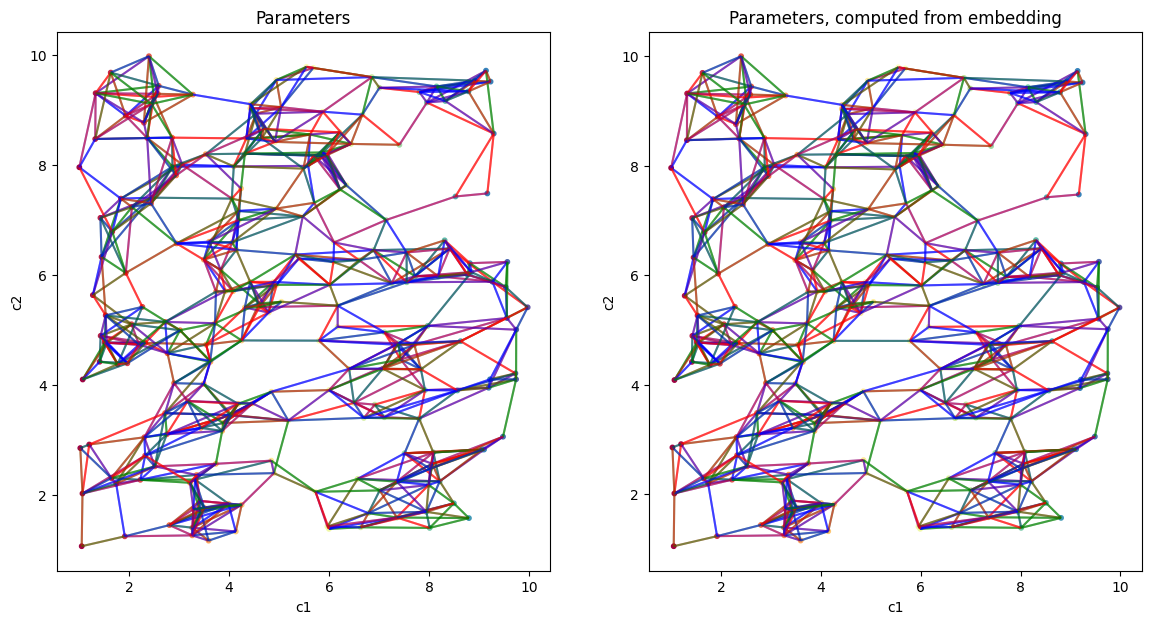

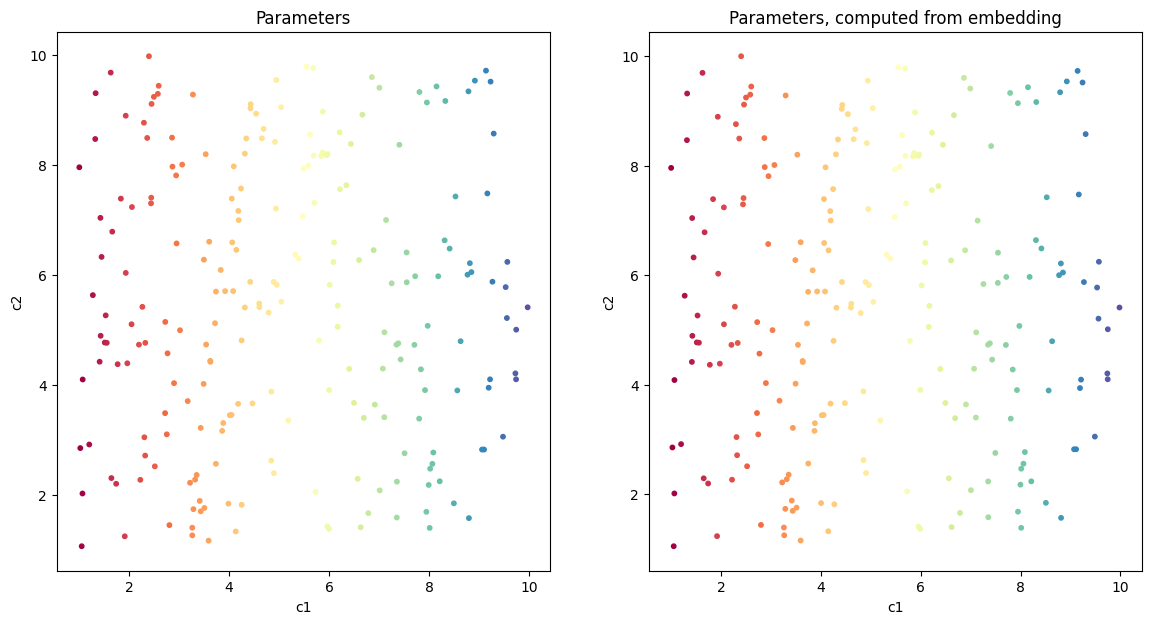

In [8]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=False)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=False)

In [19]:
mcu_experiments = MCUexperiments(mcu_model)
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, roll_generator.generate_swiss_roll,
                                                                        figure_point_cnt=200, noise_level=0,
                                                                        pieces_cnt=10, test_data_size=20,
                                                                        same_value=False)

Finding neighbors: 64 ms , optimization: 0 ms
-----------
x_opt  = [2.19063027 1.73153326], x_err = 0.018738761410706278
x_real = [1.80872294 1.5755359 ]
Finding neighbors: 63 ms , optimization: 0 ms
-----------
x_opt  = [1.96786339 1.83356792], x_err = 0.012576406597717556
x_real = [1.32366717 1.5972658 ]
Finding neighbors: 63 ms , optimization: 0 ms
-----------
x_opt  = [2.07212738 1.92832032], x_err = 0.0169546009616159
x_real = [1.72889966 1.80479977]
Finding neighbors: 62 ms , optimization: 0 ms
-----------
x_opt  = [2.17570035 1.7048175 ], x_err = 0.01784448547686828
x_real = [1.55512456 1.37932697]
Finding neighbors: 63 ms , optimization: 0 ms
-----------
x_opt  = [2.09559295 1.85026681], x_err = 0.016748058210601616
x_real = [1.66895163 1.7434213 ]
Finding neighbors: 63 ms , optimization: 1 ms
-----------
x_opt  = [1.82775977 1.949582  ], x_err = 0.013954124544422476
x_real = [1.22470352 1.65431418]
Finding neighbors: 61 ms , optimization: 0 ms
-----------
x_opt  = [2.18504615 

In [16]:
interval_runs_base, intervals_base = mcu_experiments.test_predictive_optimization(lw, up,
                                                                                  roll_generator.generate_swiss_roll,
                                                                                  figure_point_cnt=200, noise_level=0,
                                                                                  pieces_cnt=10, test_data_size=20,
                                                                                  same_value=False, baseline=True)

-----------
x_opt  = [1.91291355 1.23870493], x_err = 0.037141898880723064
x_real = [1.79503412 1.7867908 ]
-----------
x_opt  = [1.05151056 1.05841584], x_err = 0.09082019435416992
x_real = [1.60286638 1.24904634]
-----------
x_opt  = [1.05151056 1.05841584], x_err = 0.08547351773222714
x_real = [1.47958417 1.65213835]
-----------
x_opt  = [1.06710963 2.0186006 ], x_err = 0.03849864327435881
x_real = [1.31915785 1.75162299]
-----------
x_opt  = [1.05151056 1.05841584], x_err = 0.07819230244943011
x_real = [1.2464888  1.39732769]
-----------
x_opt  = [1.05151056 1.05841584], x_err = 0.09897062159488469
x_real = [1.41788402 1.10378243]
-----------
x_opt  = [1.05151056 1.05841584], x_err = 0.08808743667686021
x_real = [1.18199748 1.12911151]
-----------
x_opt  = [1.05151056 1.05841584], x_err = 0.07980143844048788
x_real = [1.1142503  1.23370923]
-----------
x_opt  = [1.91291355 1.23870493], x_err = 0.04048480085332094
x_real = [1.87793248 1.38994029]
-----------
x_opt  = [1.05151056 1.0

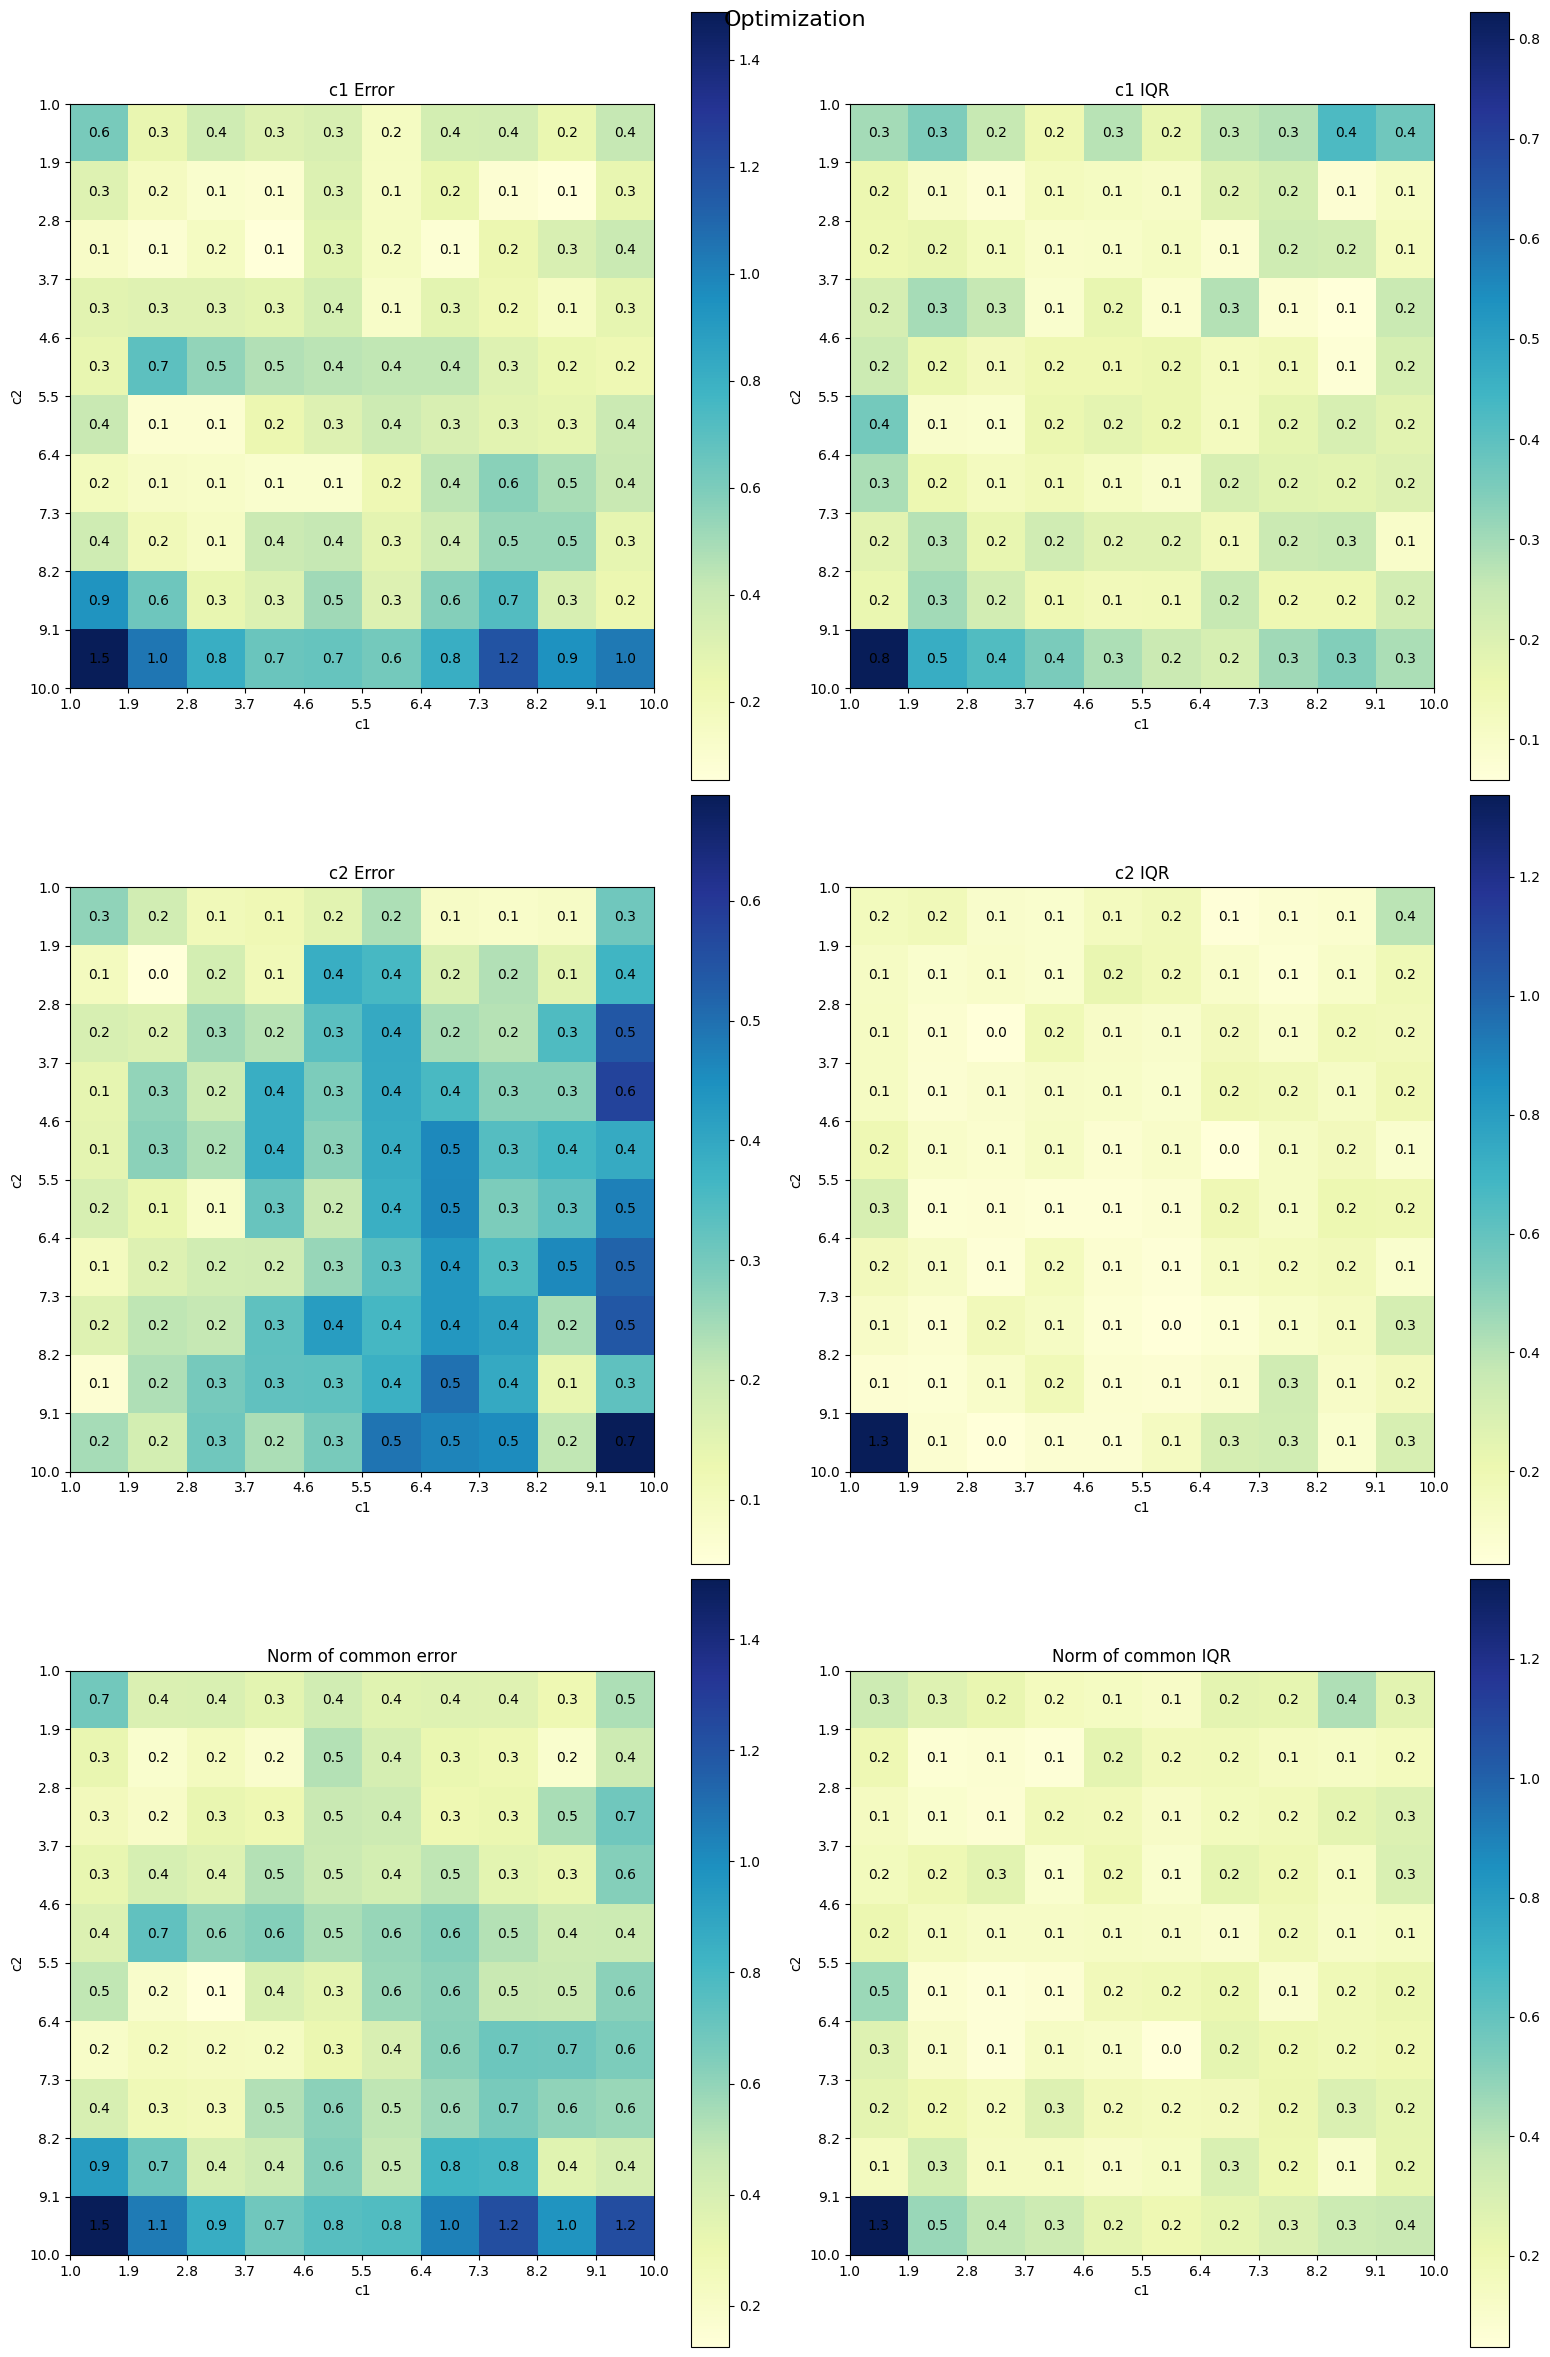

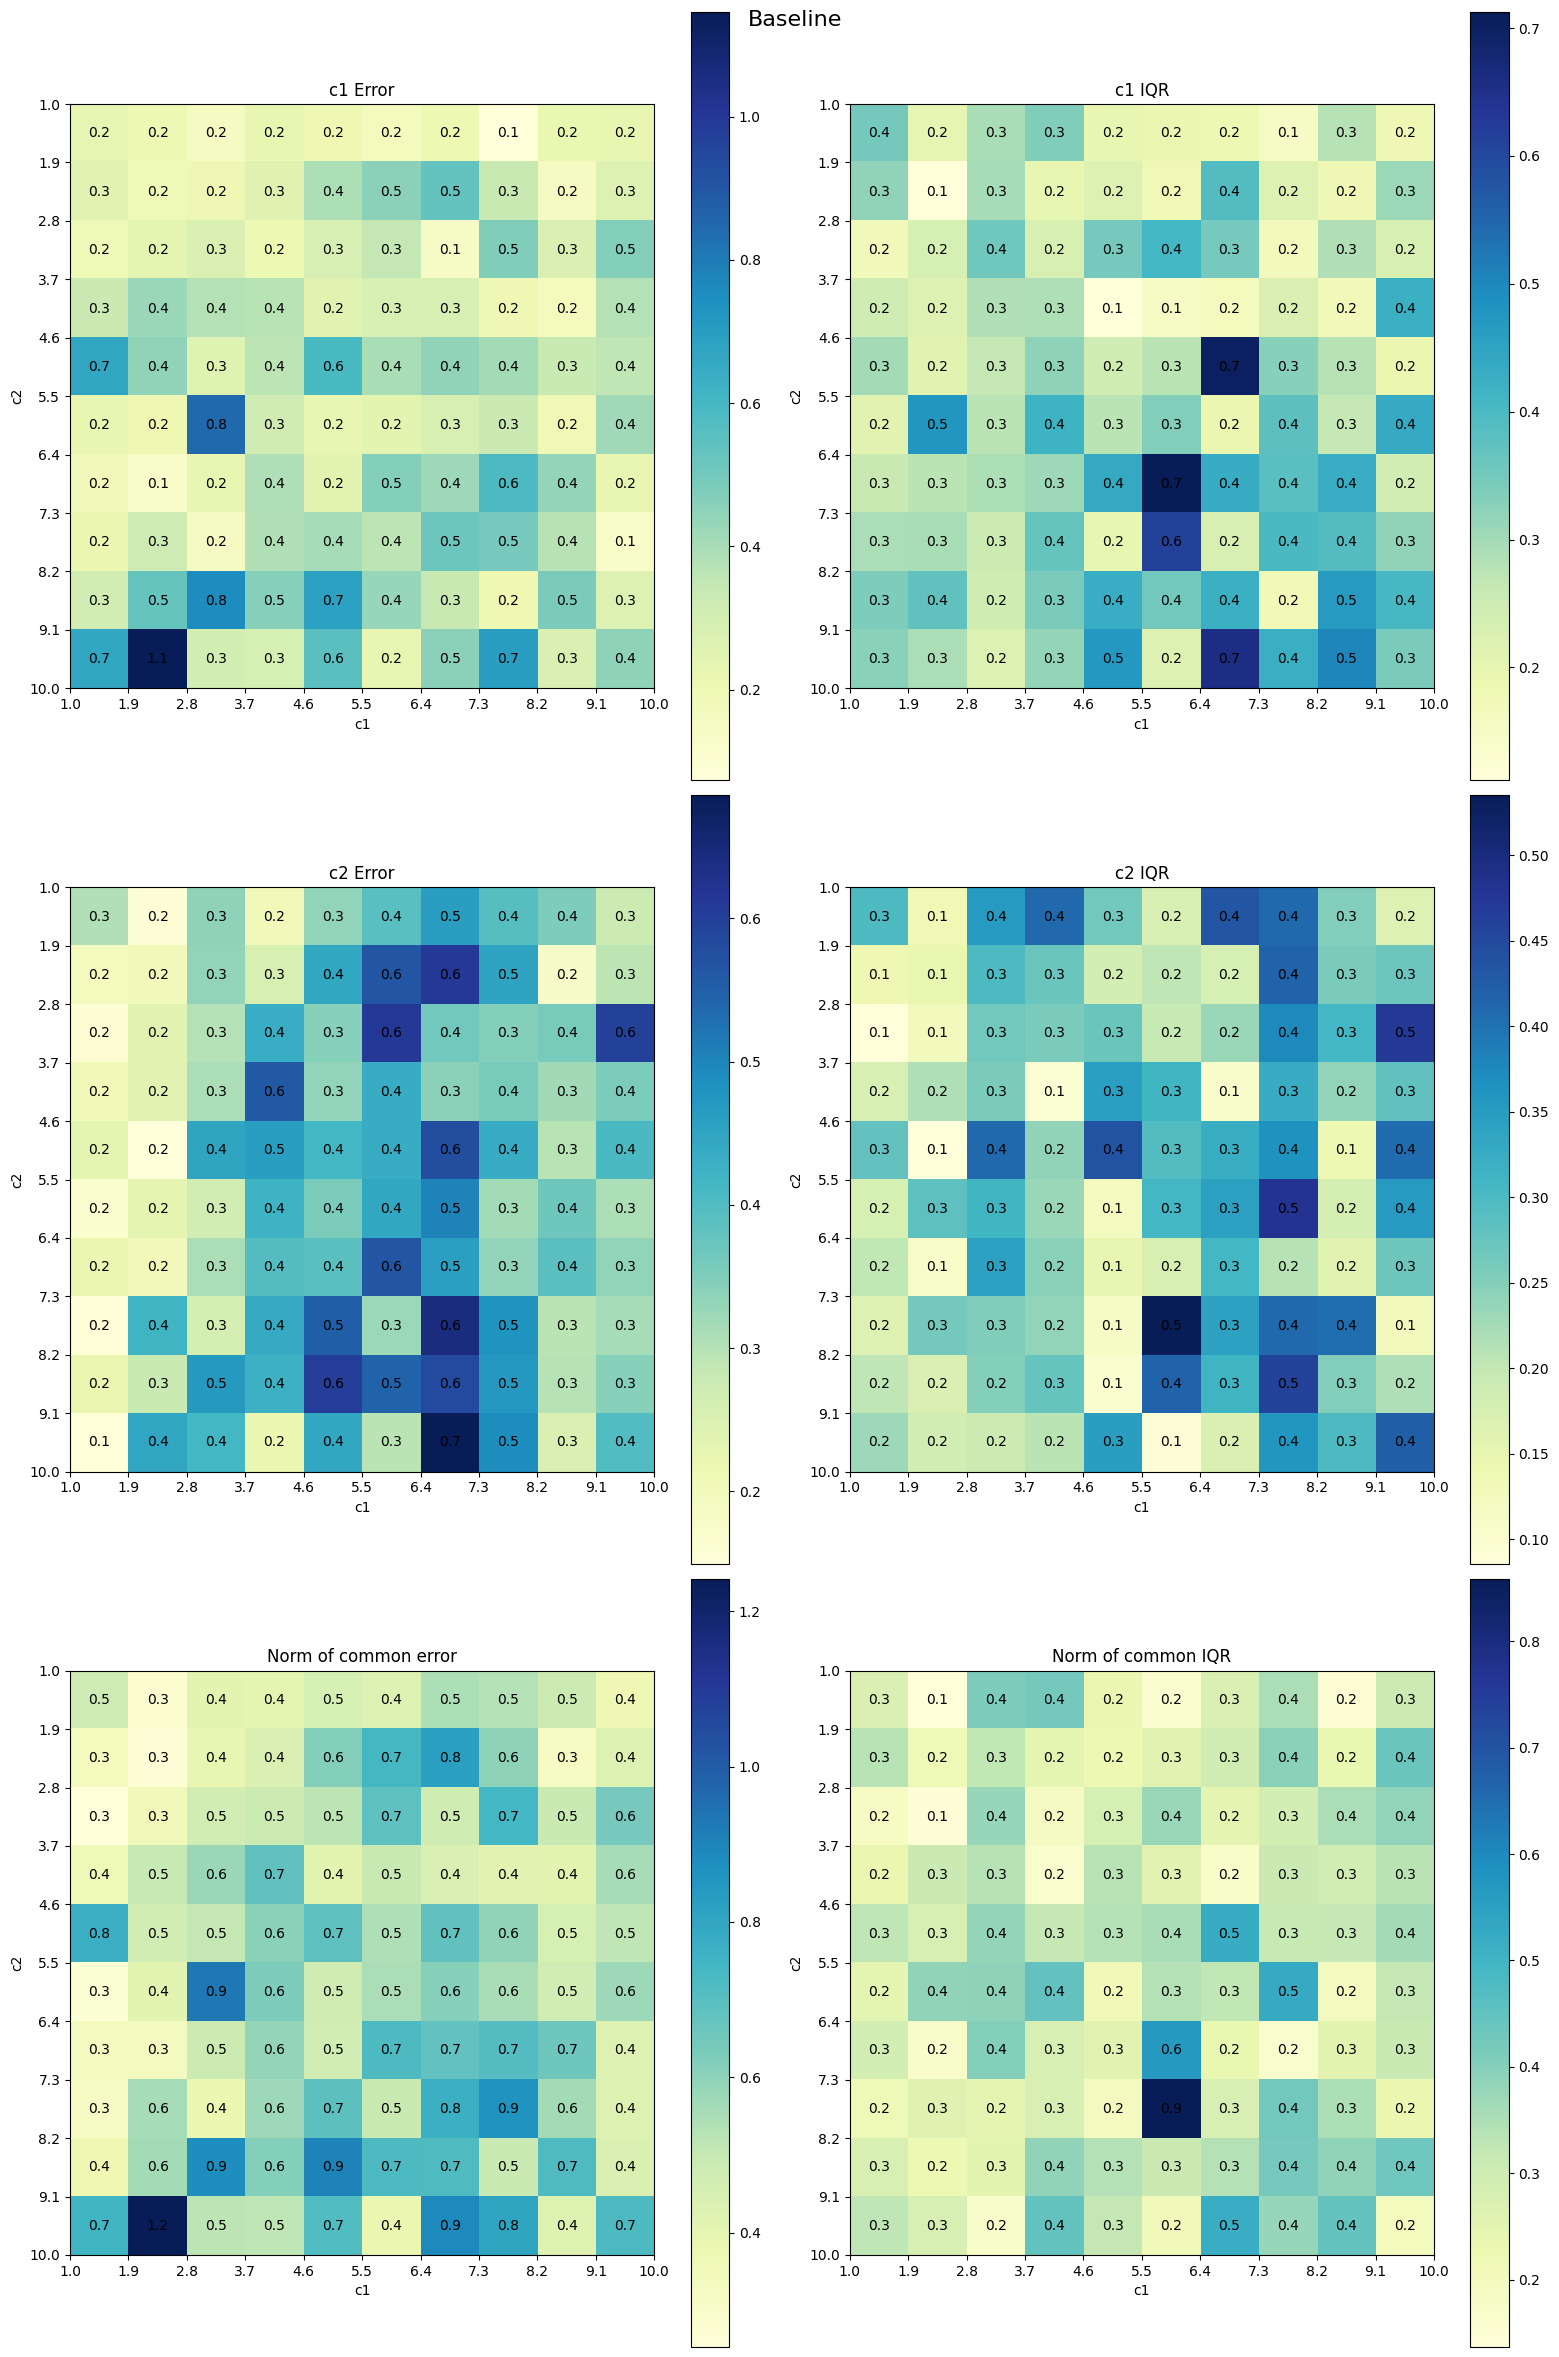

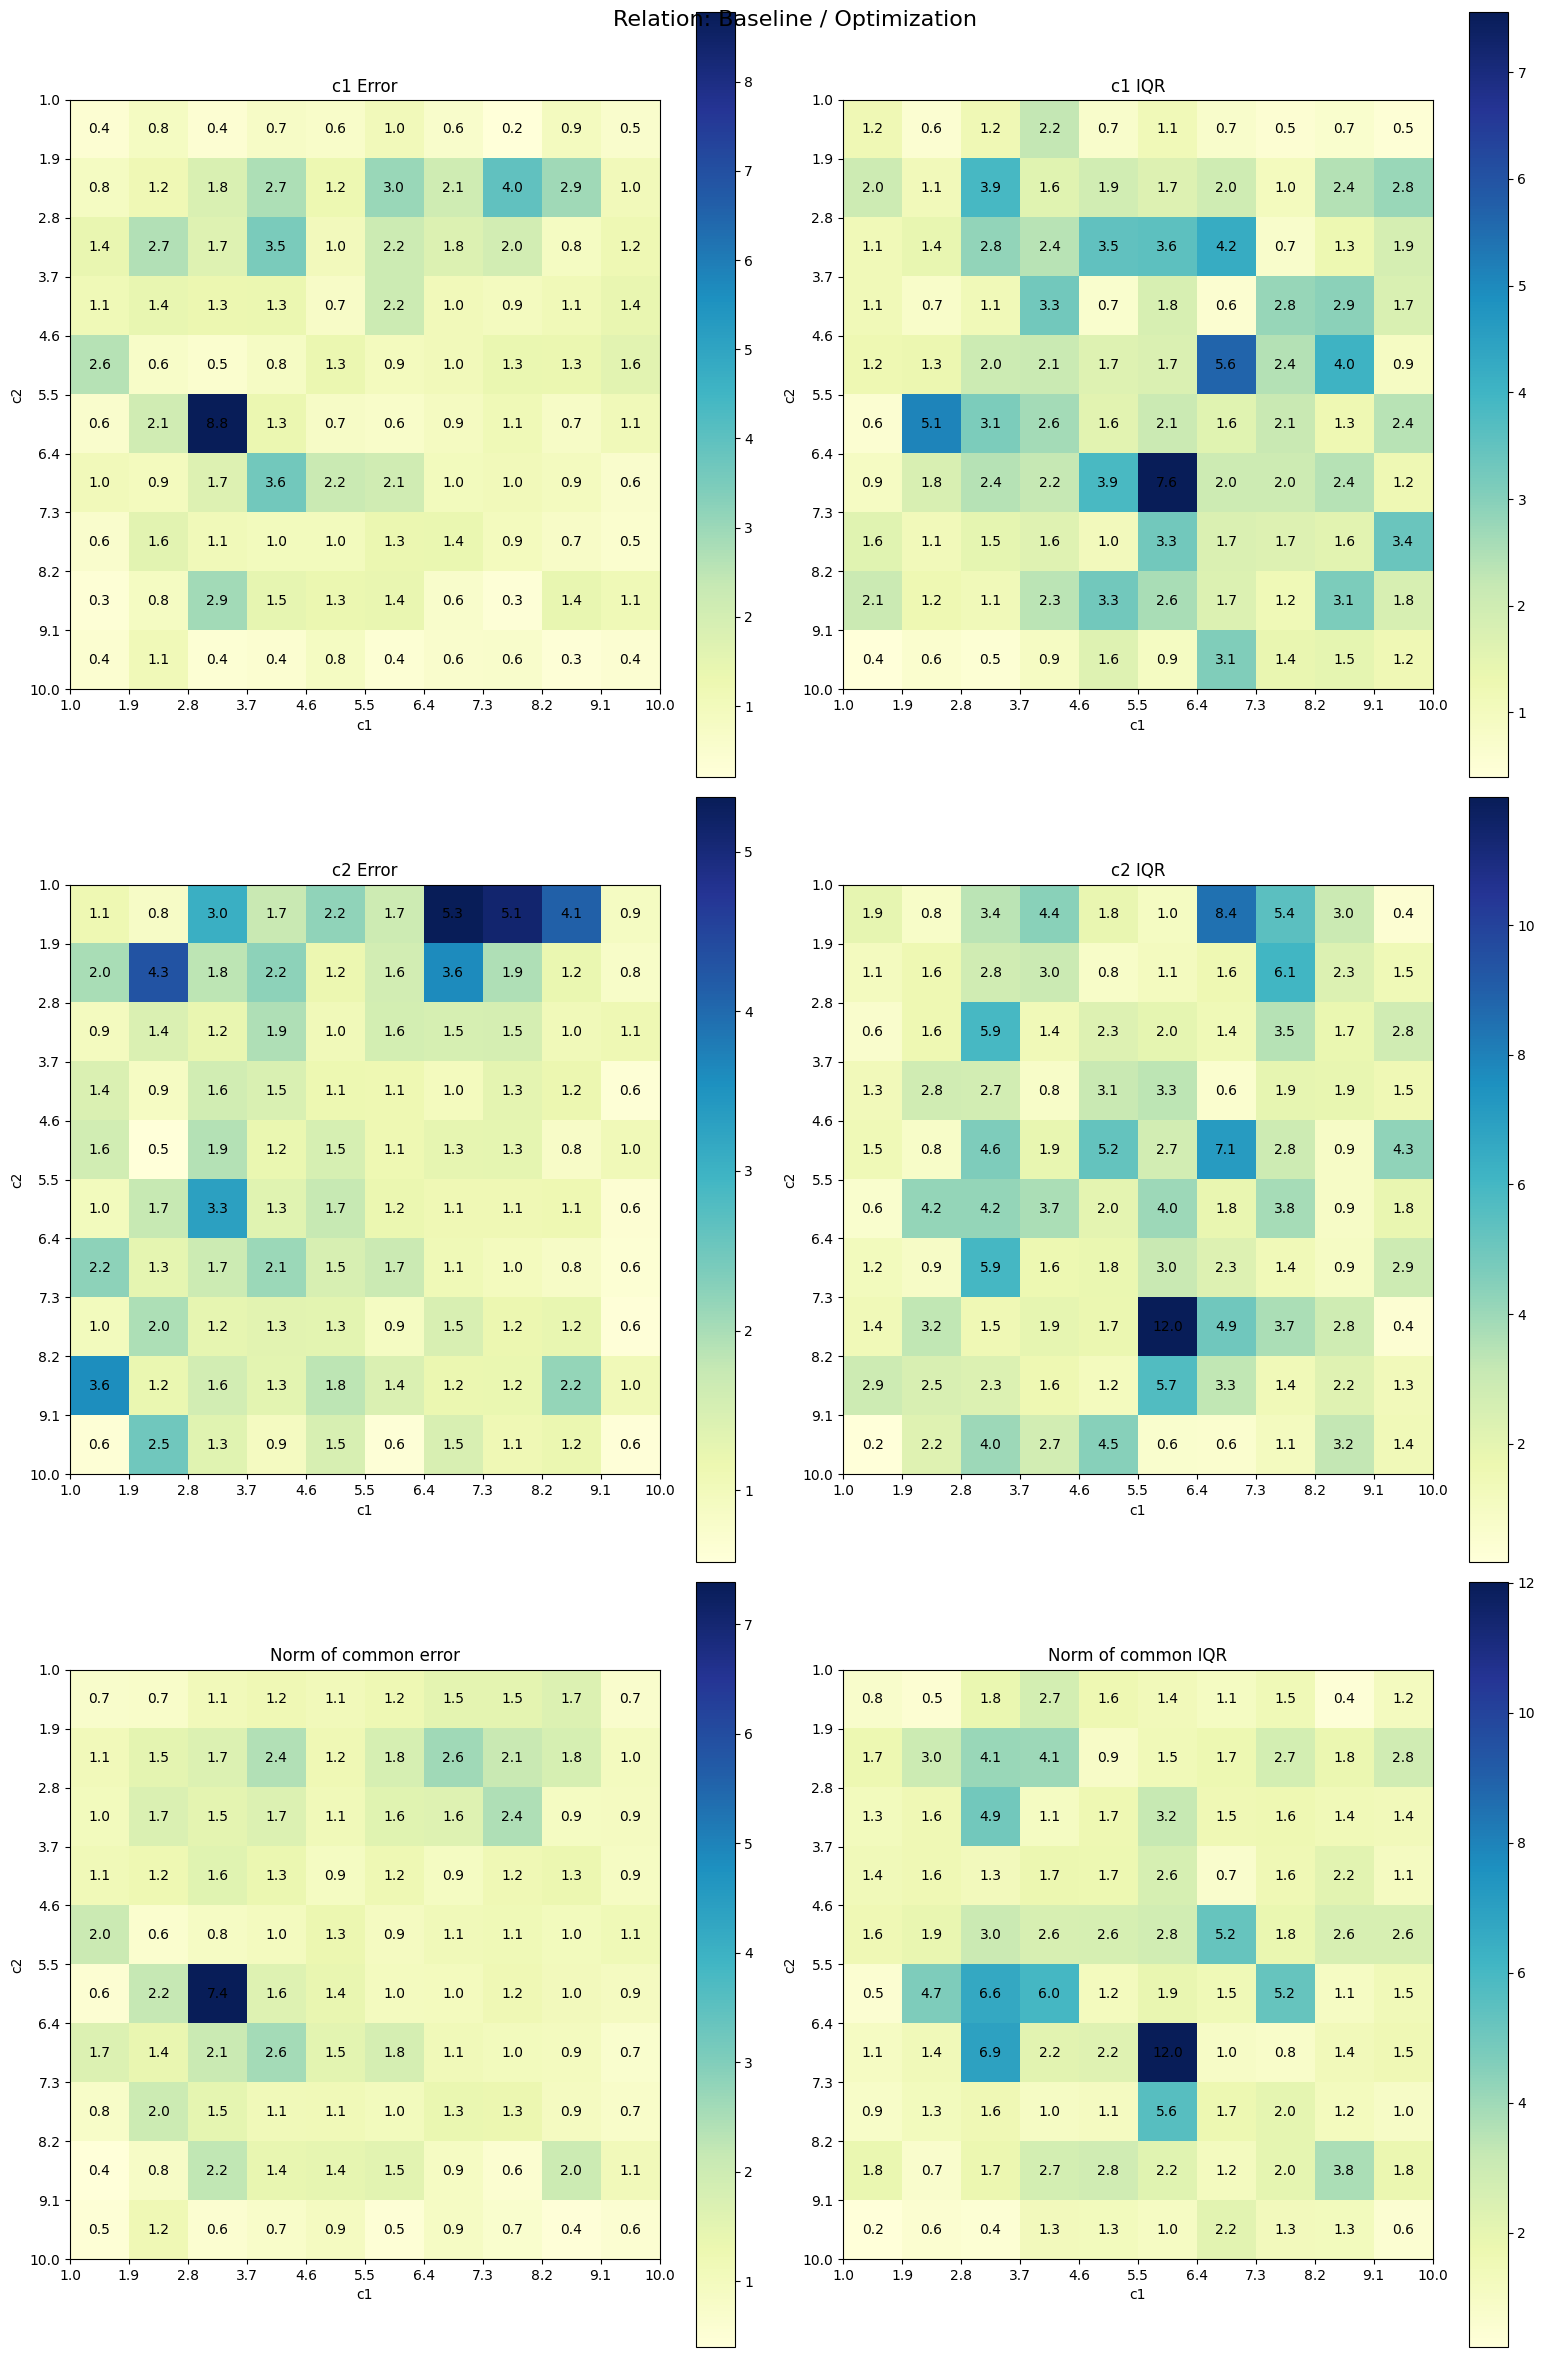

In [20]:
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, filename="images/ch_roll.png", title="Optimization")
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals_base, interval_runs_base, filename="images/ch_roll_base.png", title="Baseline")
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs_base / interval_runs, filename = f"images/ch_roll_rel.png", title="Relation: Baseline / Optimization")

24.49489742783178